In [1]:
from ai_agent_main import ai_agent_main_trails
from dyna_q_agent import dyna_q_agent_trail
#Plotting function
from matplotlib import pyplot as plt
import numpy as np

def plot_subresultsci(ql,sample):

    ql_rewards_means = np.mean(ql, axis=1)
    ql_rewards_stddev = np.std(ql, axis=1)

    plt.plot(range(sample-1),ql_rewards_means[:-1])
    plt.fill_between(range(sample-1), ql_rewards_means[:-1] + ql_rewards_stddev[:-1], ql_rewards_means[:-1] - ql_rewards_stddev[:-1], alpha=0.3)
    
    plt.xlabel("Successful Episodes")
    plt.ylabel("Episodes")

#Active Inf Parameters
#Fixed time-horizon for planning
T=15
#trials for data_calc
trials=10
#Sm_pars list
sm_pars=[1,10,100]
#Total time_steps
time_steps=10000
#Mutation_time
switch_time=11000

# # Dyna-Q Agent (Dyna-Q k=0 means Q-Learning)
# episodes=dyna_q_agent_trail(time_steps,switch_time)
# with open('dyna_q_data.npy', 'wb') as file:
#     np.save(file, episodes)

#dyna_q
with open('dyna_q_data.npy', 'rb') as file:
    episodes_dyna = np.load(file)

plot_subresultsci(np.transpose(episodes_dyna[0]),np.shape(episodes_dyna[0][1])[0])
plot_subresultsci(np.transpose(episodes_dyna[1]),np.shape(episodes_dyna[0][1])[0])
plot_subresultsci(np.transpose(episodes_dyna[2]),np.shape(episodes_dyna[0][1])[0])
plt.legend(["k=0","k=5","k=10"])
plt.title("Dyna-Q agent (Level-1)")
plt.savefig('dyna_q_20', dpi=500, bbox_inches='tight');

In [2]:
# ActiveInferenceTrials
# Case-2 Known-A, Learn-B (Zero.prior-B)

#A-known?
a_known=1
#supply_grid_prior?
grid_prior=0

%time episodes,modeldeviation,obsenoisedev=ai_agent_main_trails(T,trials,sm_pars,time_steps,switch_time,a_known,grid_prior)

Gamma 0
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Gamma 1
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Gamma 2
Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
CPU times: user 9h 53min 18s, sys: 3.15 s, total: 9h 53min 21s
Wall time: 21h 53min 36s


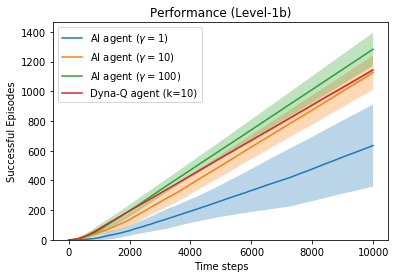

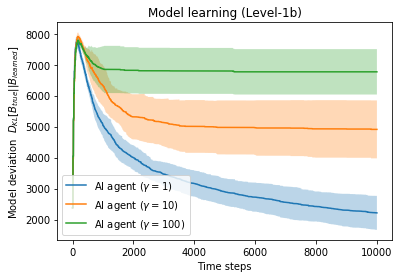

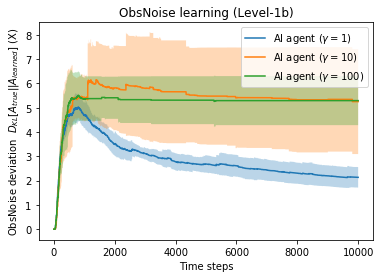

In [3]:
with open('ai_agent_performance_data_2.npy', 'wb') as file:
    np.save(file, episodes)
with open('ai_agent_modellearning_data_2.npy', 'wb') as file:
    np.save(file, modeldeviation)
with open('ai_agent_liklilearning_data_2.npy', 'wb') as file:
    np.save(file, obsenoisedev)
    
with open('ai_agent_performance_data_2.npy', 'rb') as file:
    episodes= np.load(file)
with open('ai_agent_modellearning_data_2.npy', 'rb') as file:
    modeldeviation=np.load(file)
with open('ai_agent_liklilearning_data_2.npy', 'rb') as file:
    obsenoisedev=np.load(file)

episodes_1=episodes[0]
episodes_2=episodes[1]
episodes_3=episodes[2]

modeldeviation_t_1=modeldeviation[0]
modeldeviation_t_2=modeldeviation[1]
modeldeviation_t_3=modeldeviation[2]

obsenoisedev_t_1=obsenoisedev[0]
obsenoisedev_t_2=obsenoisedev[1]
obsenoisedev_t_3=obsenoisedev[2]

plot1 = plt.figure(1)
plot_subresultsci(np.transpose(episodes_1),np.shape(episodes_1[0])[0])
plot_subresultsci(np.transpose(episodes_2),np.shape(episodes_2[0])[0])
plot_subresultsci(np.transpose(episodes_3),np.shape(episodes_3[0])[0])
plot_subresultsci(np.transpose(episodes_dyna[2]),np.shape(episodes_dyna[0][1])[0])
plt.legend(["AI agent ($\gamma=1$)","AI agent ($\gamma=10$)","AI agent ($\gamma=100$)","Dyna-Q agent (k=10)"])
plt.xlabel("Time steps")
plt.ylabel("Successful Episodes")
plt.ylim(bottom=0)
plt.title("Performance (Level-1b)")
plt.savefig('Performance_T15_1b', dpi=500, bbox_inches='tight')

plot2 = plt.figure(2)
plot_subresultsci(np.transpose(modeldeviation_t_1),np.shape(modeldeviation_t_1[0])[0])
plot_subresultsci(np.transpose(modeldeviation_t_2),np.shape(modeldeviation_t_2[0])[0])
plot_subresultsci(np.transpose(modeldeviation_t_3),np.shape(modeldeviation_t_3[0])[0])
plt.legend(["AI agent ($\gamma=1$)","AI agent ($\gamma=10$)","AI agent ($\gamma=100$)"])
plt.xlabel("Time steps")
plt.ylabel("Model deviation  $D_{KL}[B_{true} || B_{learned}] $")
plt.title("Model learning (Level-1b)")
plt.savefig('ModDev1_T15_1b', dpi=500, bbox_inches='tight')

plot3 = plt.figure(3)
plot_subresultsci(np.transpose(obsenoisedev_t_1),np.shape(obsenoisedev_t_1[0])[0])
plot_subresultsci(np.transpose(obsenoisedev_t_2),np.shape(obsenoisedev_t_2[0])[0])
plot_subresultsci(np.transpose(obsenoisedev_t_3),np.shape(obsenoisedev_t_3[0])[0])
plt.legend(["AI agent ($\gamma=1$)","AI agent ($\gamma=10$)","AI agent ($\gamma=100$)"])
plt.xlabel("Time steps")
plt.ylabel("ObsNoise deviation  $D_{KL}[A_{true} || A_{learned}] $ (X)")
plt.title("ObsNoise learning (Level-1b)")
plt.savefig('ObsDev1_T15_1b', dpi=500, bbox_inches='tight')